In [2]:
# importing all libraries
import numpy as np

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

#Reading Data
telco_base_data = pd.read_csv('/content/Customer-Churn.csv')

In [ ]:
telco_base_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [12]:
telco_base_data.PhoneService.value_counts()/len(telco_base_data)*100

Yes    90.316626
No      9.683374
Name: PhoneService, dtype: float64

In [13]:
telco_base_data.Partner.value_counts()/len(telco_base_data)*100

No     51.69672
Yes    48.30328
Name: Partner, dtype: float64

In [14]:
## how many churners
telco_base_data.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [15]:
# the churn rate is
telco_base_data.Churn.value_counts()/len(telco_base_data)*100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [16]:
telco_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [17]:
# convert the object values of TotalCharges to numerical datatype
telco_base_data.TotalCharges = pd.to_numeric(telco_base_data.TotalCharges,errors= 'coerce')


In [18]:
telco_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [19]:
# to know about how many null values
telco_base_data.isnull().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

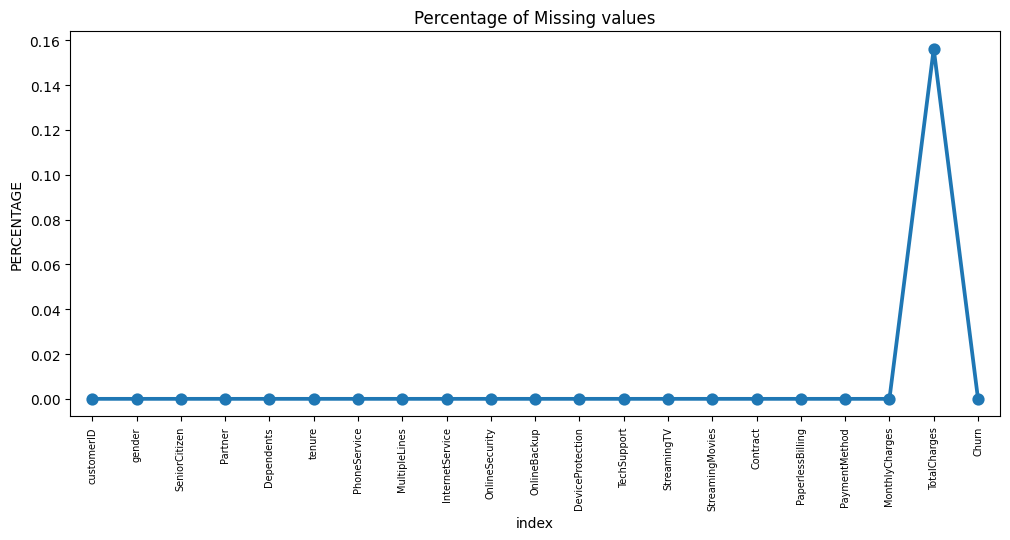

In [20]:
#HAndling missing values
missing = pd.DataFrame((telco_base_data.isnull().sum())*100/telco_base_data.shape[0]).reset_index()
plt.figure(figsize=(12,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

#it Shows Totalcharges has minimum missing values i.e 0.15% So ,it depends on us how we treat its very small value so we can drop this and start further processing .
#if we want to treat them then use mean() or median()


Data Cleaning


In [21]:
telco_base_data.dropna(how='any', inplace=True)

In [22]:
#dropna
#fillna



#After dropping null values

telco_base_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [23]:
len(telco_base_data)

7032

In [24]:
telco_base_data.head(6)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes


In [25]:
# divide the tenure data into bins
telco_base_data.tenure.min()

1

In [26]:
telco_base_data.tenure.max()

72

<Axes: >

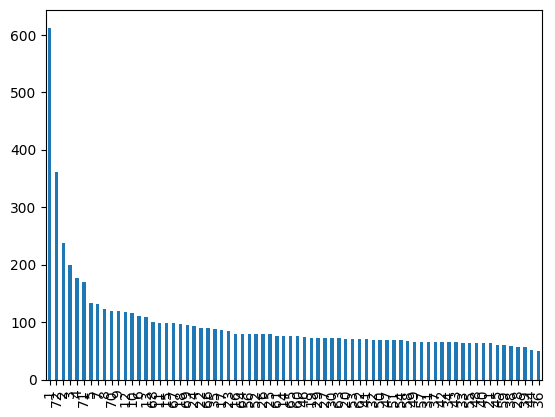

In [27]:
telco_base_data.tenure.value_counts().plot(kind='bar')

In [29]:
#before bins tenure data graphs look like too messy and difficult to understand so that is why we need to create bins

# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

telco_base_data['tenure_group'] = pd.cut(telco_base_data.tenure, range(1, 80, 12), right=False, labels=labels)

<Axes: >

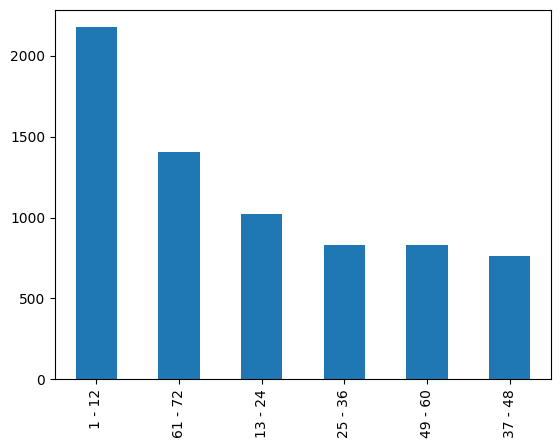

In [30]:
telco_base_data['tenure_group'].value_counts().plot(kind='bar')

In [31]:
telco_base_data.describe() # statistical info about numerical columns

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
# it shows only 4 columns because these are only have numerical data senior citizen treated as categorical


Dropping unnecessary columns

In [32]:
telco_base_data.drop(columns=['customerID', 'tenure'], inplace=True)

In [33]:
telco_base_data.head(5)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


Data Exploration-EDA

Categorical Univariate Analysis


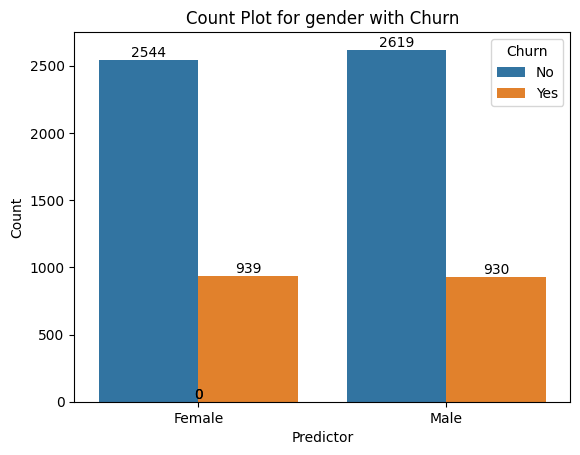

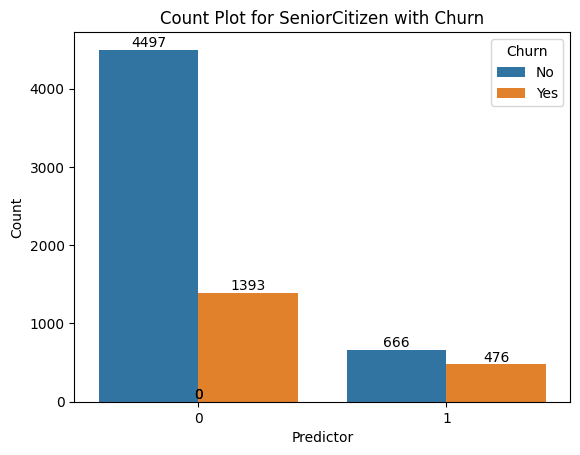

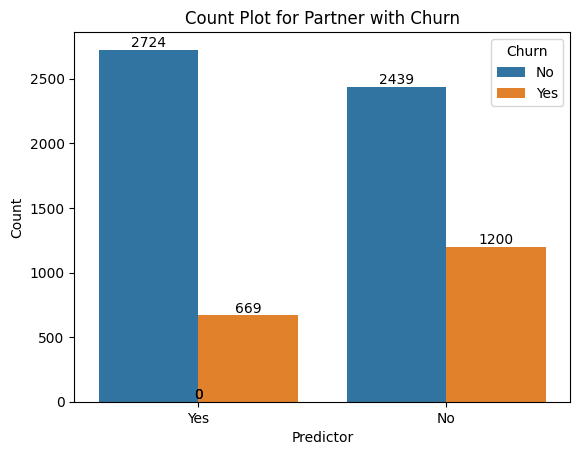

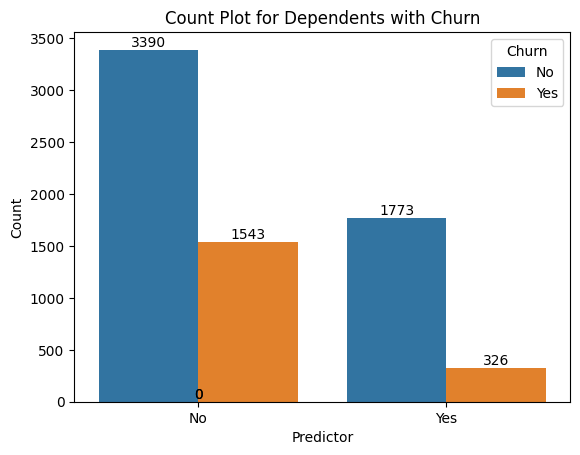

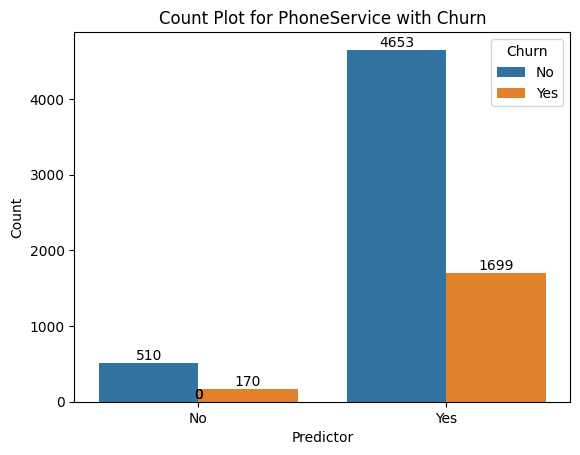

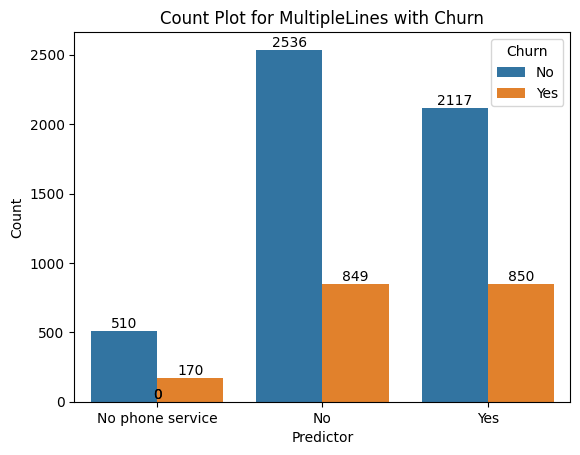

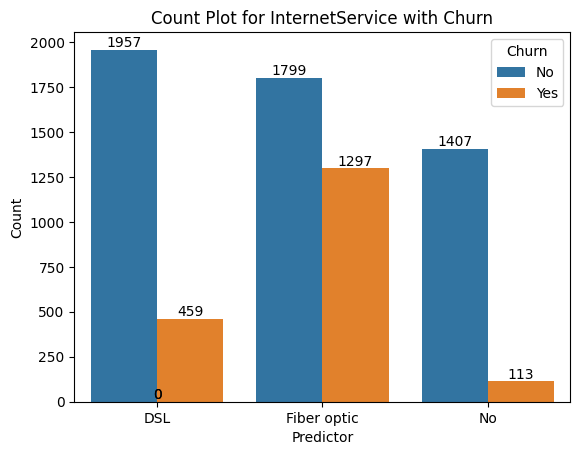

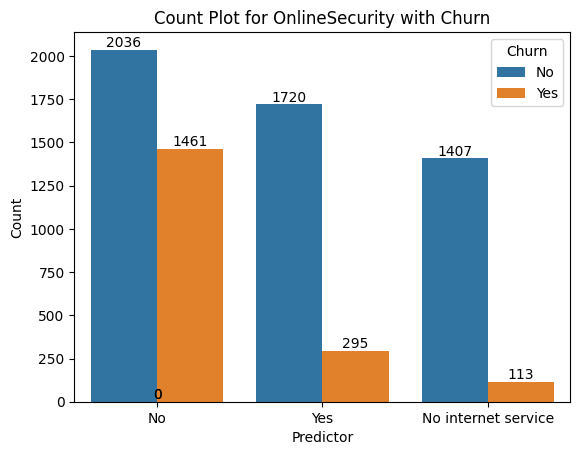

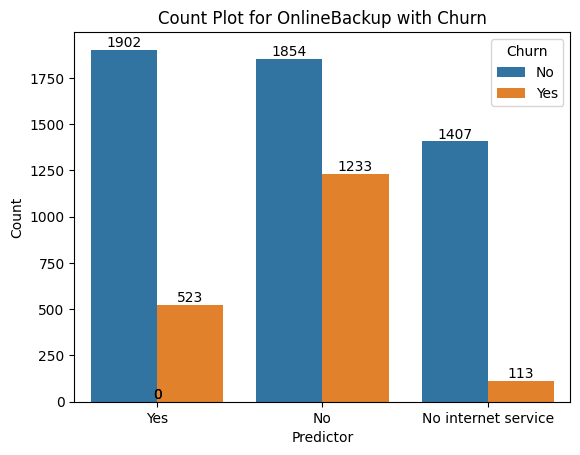

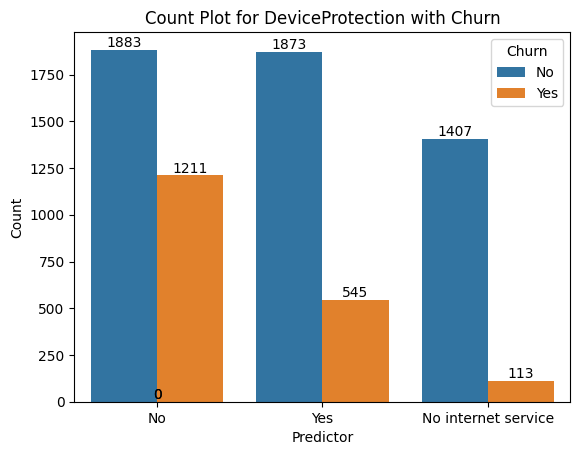

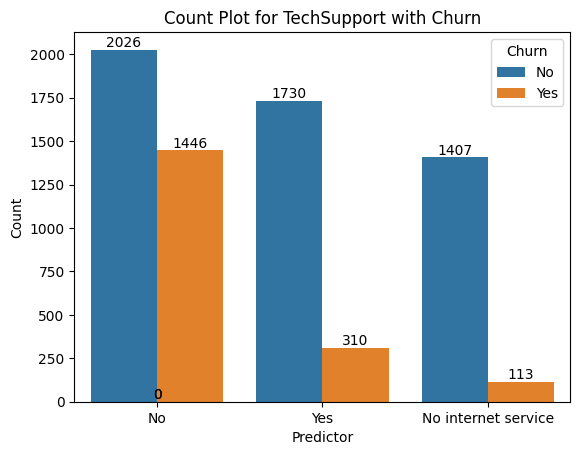

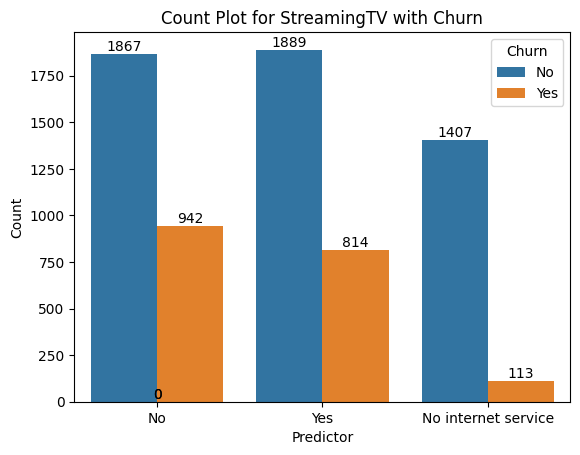

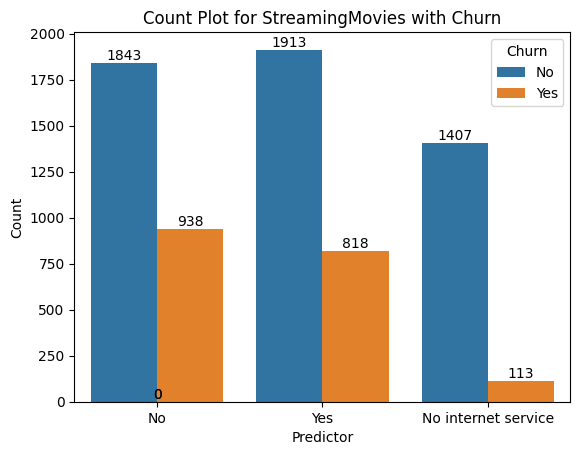

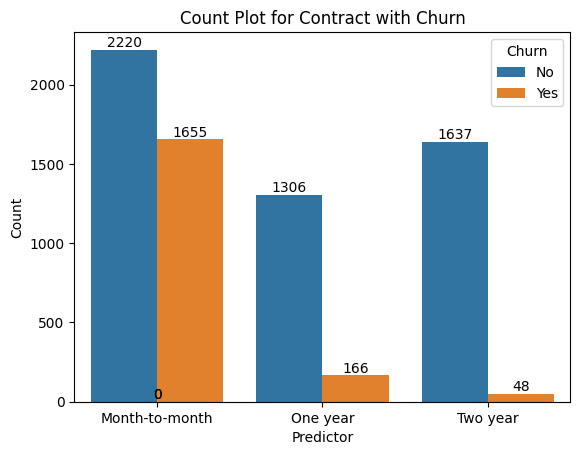

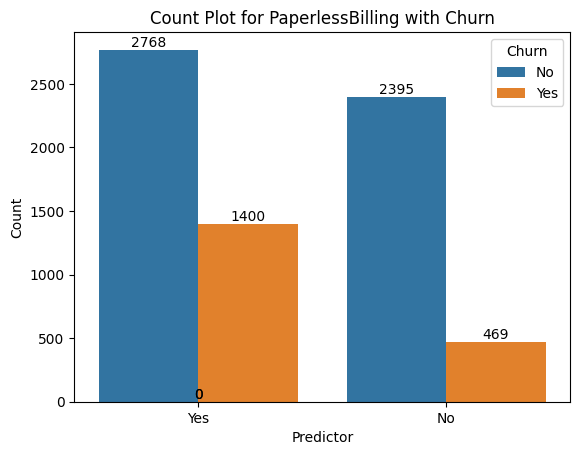

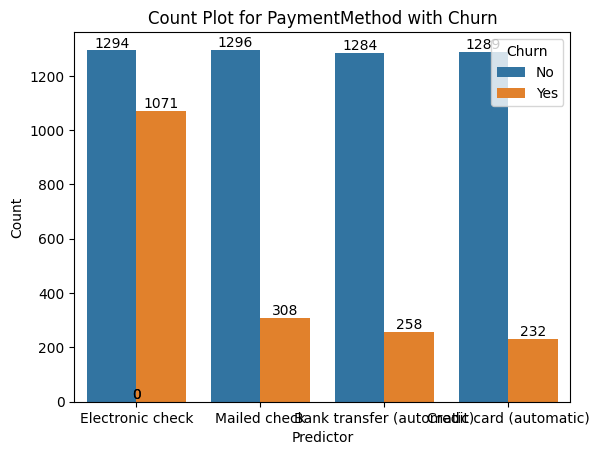

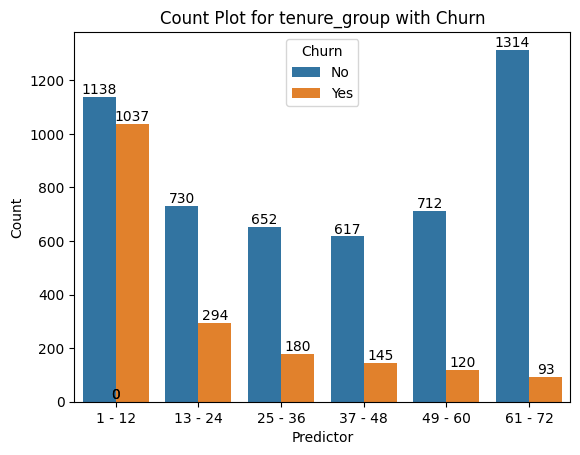

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Iterate through the predictors and create count plots with labels
for i, predictor in enumerate(telco_base_data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):   #churn is y variable and rest are numerical
    plt.figure(i)
    ax = sns.countplot(data=telco_base_data, x=predictor, hue='Churn')

    # Add labels to the bars
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

    ax.set_xlabel('Predictor')  # Set x-axis label
    ax.set_ylabel('Count')  # Set y-axis label
    ax.set_title('Count Plot for ' + predictor + ' with Churn')  # Set plot title
    plt.show()

# ***Numerical Univariate Analysis***




Doing Churn Analysis with MonthlyCharges

<ipython-input-36-78b3a1464aa2>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  MonthlyCharges = sns.kdeplot(telco_base_data.MonthlyCharges[(telco_base_data.Churn == "No")], color='Red', shade=True)
<ipython-input-36-78b3a1464aa2>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  MonthlyCharges = sns.kdeplot(telco_base_data.MonthlyCharges[(telco_base_data.Churn == "Yes")], color='Blue', shade=True)


Text(0.5, 1.0, 'Monthly Charges by Churn')

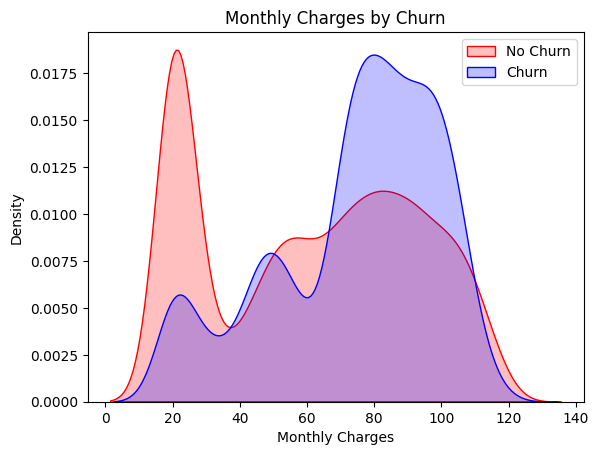

In [36]:
MonthlyCharges = sns.kdeplot(telco_base_data.MonthlyCharges[(telco_base_data.Churn == "No")], color='Red', shade=True)
MonthlyCharges = sns.kdeplot(telco_base_data.MonthlyCharges[(telco_base_data.Churn == "Yes")], color='Blue', shade=True)
MonthlyCharges.legend(labels=['No Churn', 'Churn'], loc='upper right')
MonthlyCharges.set_ylabel('Density')
MonthlyCharges.set_xlabel('Monthly Charges')
MonthlyCharges.set_title('Monthly Charges by Churn')

#Do churn analysis with TotalCharges


<ipython-input-37-b747d4fa8016>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  TotalCharges = sns.kdeplot(telco_base_data.TotalCharges[(telco_base_data.Churn == "No")], color='Red', shade=True)
<ipython-input-37-b747d4fa8016>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  TotalCharges = sns.kdeplot(telco_base_data.TotalCharges[(telco_base_data.Churn == "Yes")], color='Blue', shade=True)


Text(0.5, 1.0, 'Total Charges by Churn')

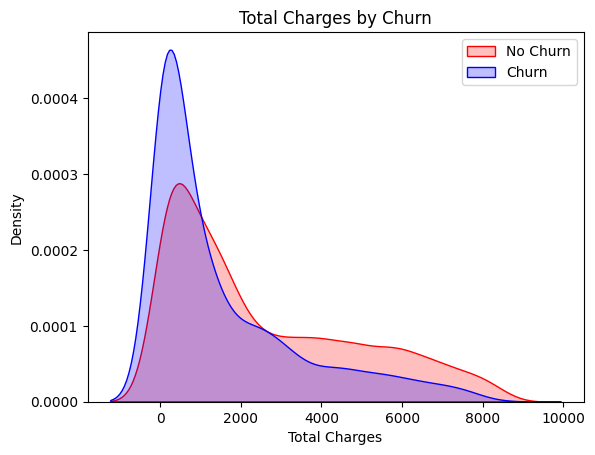

In [37]:
TotalCharges = sns.kdeplot(telco_base_data.TotalCharges[(telco_base_data.Churn == "No")], color='Red', shade=True)
TotalCharges = sns.kdeplot(telco_base_data.TotalCharges[(telco_base_data.Churn == "Yes")], color='Blue', shade=True)
TotalCharges.legend(labels=['No Churn', 'Churn'], loc='upper right')
TotalCharges.set_ylabel('Density')
TotalCharges.set_xlabel('Total Charges')
TotalCharges.set_title('Total Charges by Churn')

Find Correlation between  MonthlyCharges and  TotalCharges

In [38]:
telco_base_data.MonthlyCharges.corr(telco_base_data.TotalCharges)   #Correlation --> Pearson's Correlation Coefficient --> -1, +1 -->
#~ 1 --> Positive correlation.     when very close to 1 means high correlation
#~ -1 --> Negative correlation       when very closer. to -1 means low correlation
#~ 0 --> No or less correlation when very close to zero

0.6510648032262027

to know the correlation with each column we need to convert categorical to
 numerical to get dummies by feature encoding **technique**

In [39]:
telco_base_data['Churn'] = np.where(telco_base_data.Churn == "Yes", 1,0)
   #change column churn with 0 and 1 so we donot need to create dummy for that column

In [40]:
telco_base_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


In [41]:
telco_dummies = pd.get_dummies(telco_base_data)

In [42]:
telco_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


<Axes: >

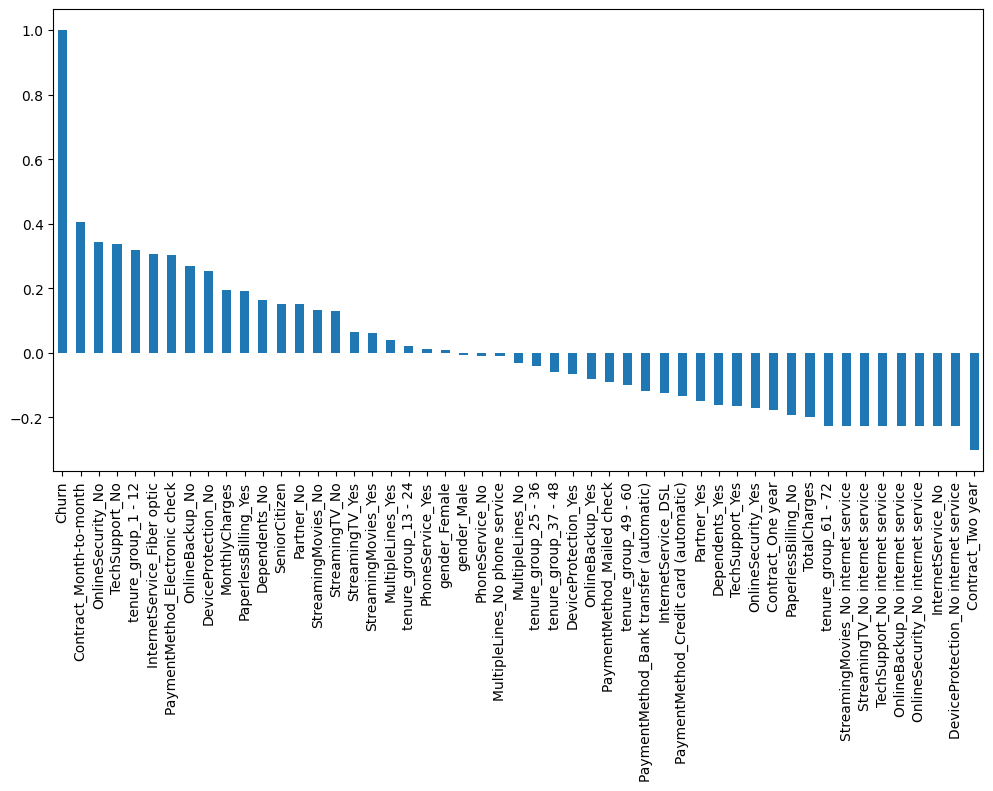

In [44]:
#plotting the   correlation of each column with respect to churn

plt.figure(figsize=(12,6))
telco_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

## **Bivariate Analysis**







In [56]:
# perform analysis with two categorical columns
new_df1_target0=telco_base_data.loc[telco_base_data["Churn"]==0]
new_df1_target1=telco_base_data.loc[telco_base_data["Churn"]==1]

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

def uniplot(df, col, title, hue=None): #perform uniplot pass the dataframe with two columns title and hue
    plt.figure(figsize=(10, 6))         # Set the size of the graph
    plt.title(title)                    #set the title
    ax = sns.countplot(data=df, x=col, hue=hue, palette='bright')
     # Add labels to the bars
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')


    # Adjust the size of the legend
    if hue:
        ax.legend(fontsize='small')  #  adjust the fontsize as needed

    plt.show()


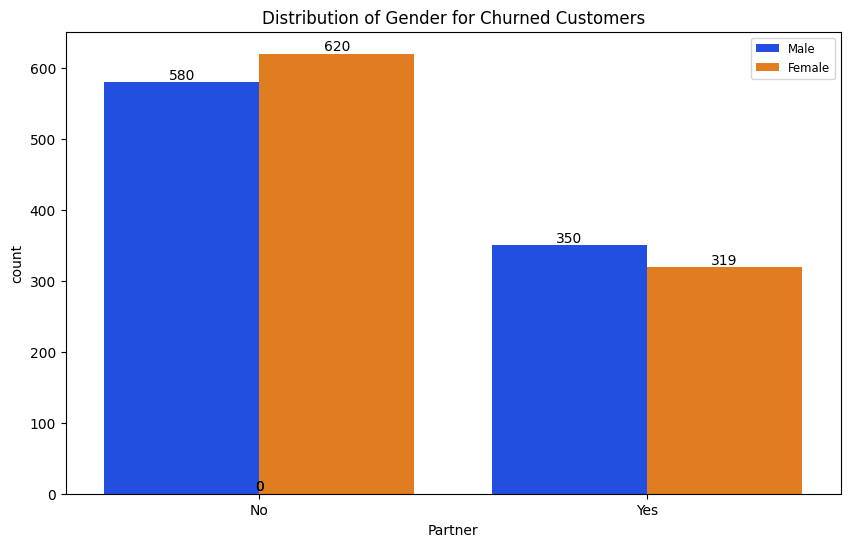

In [64]:
uniplot(new_df1_target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

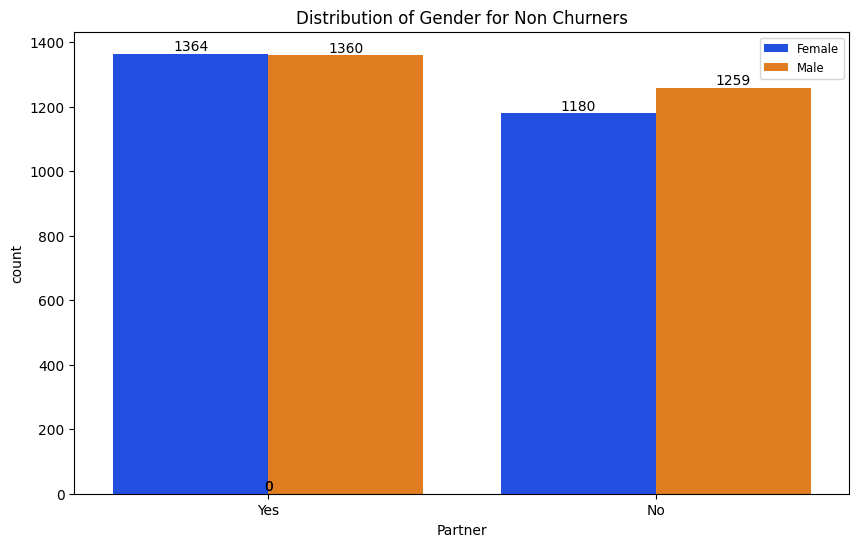

In [65]:
uniplot(new_df1_target0,col='Partner',title='Distribution of Gender for Non Churners',hue='gender')

Churn Rate of Male with Partner:20.4%

Male with no Partner:31.6%

Female with Partner:18.56%

Female with no Partner:35.88%

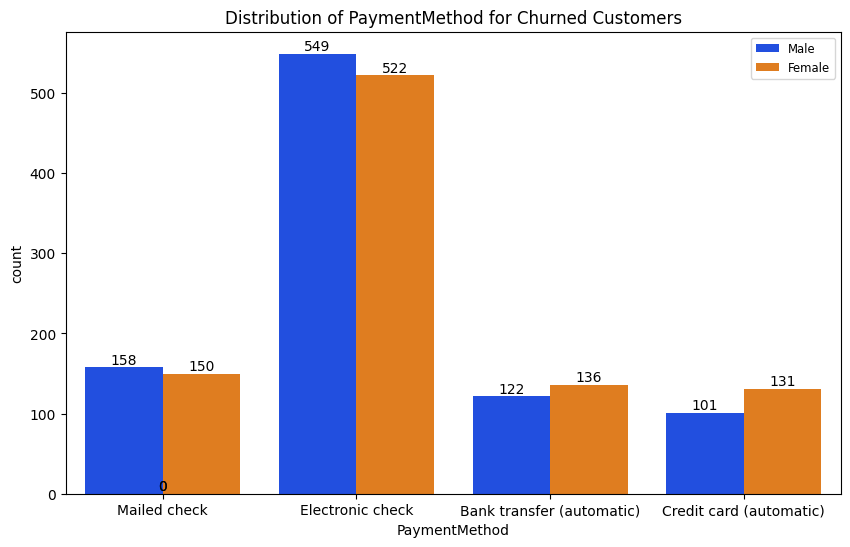

In [66]:
uniplot(new_df1_target1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

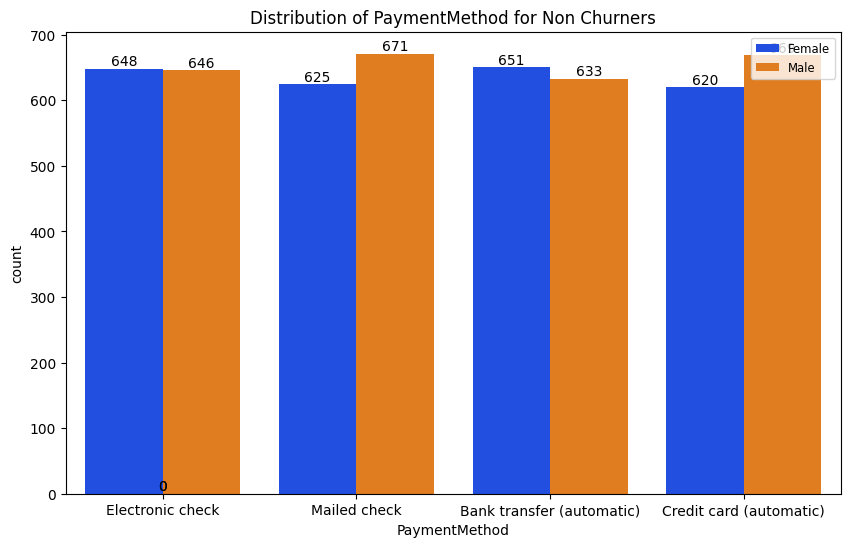

In [67]:
uniplot(new_df1_target0,col='PaymentMethod',title='Distribution of PaymentMethod for Non Churners',hue='gender')

Insights
Churn Rate Of Female PaymentMethod with Mailed check:19.3%

Electronic Check:44.6%

BankTransfer:17.2%

Credit Card:17.4%

Churn Rate Of Males PaymentMethod with Mailed check:19%

Electronic Check:45.9%

BankTransfer:16.1%

Credit Card:13.2%

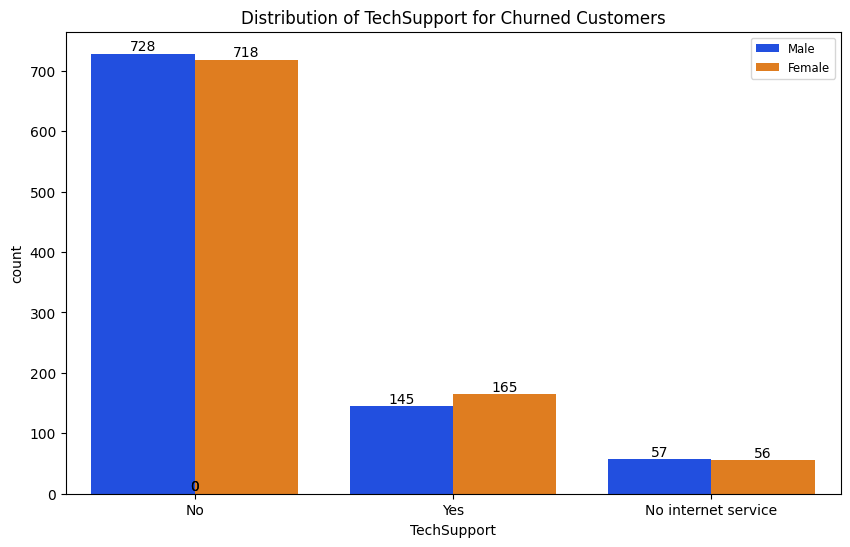

In [68]:
uniplot(new_df1_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

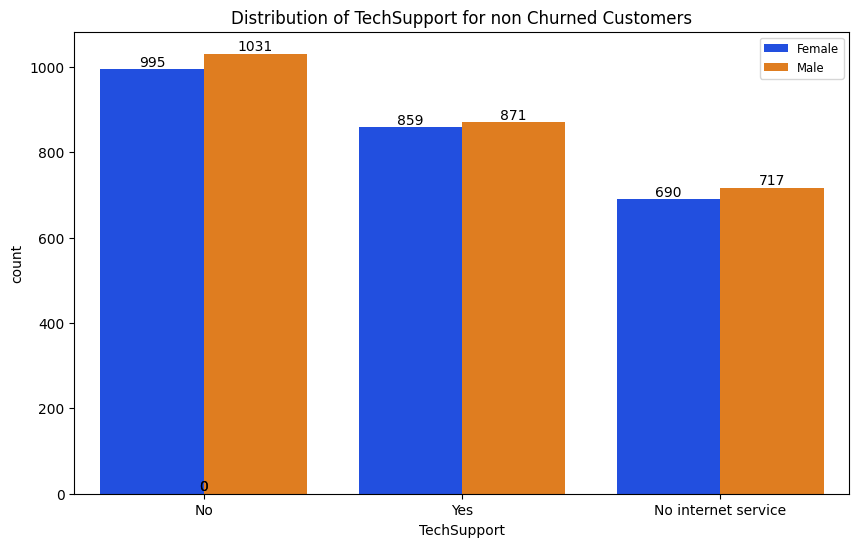

In [71]:
uniplot(new_df1_target0,col='TechSupport',title='Distribution of TechSupport for non Churned Customers',hue='gender')

Churn Rate of males without TechSupport:41.3%

With TechSupport:14.2%

No internetService:7.3%

Churn Rate of females without TechSupport:41.9%

With TechSupport:16.1%

No internetService:7.5%

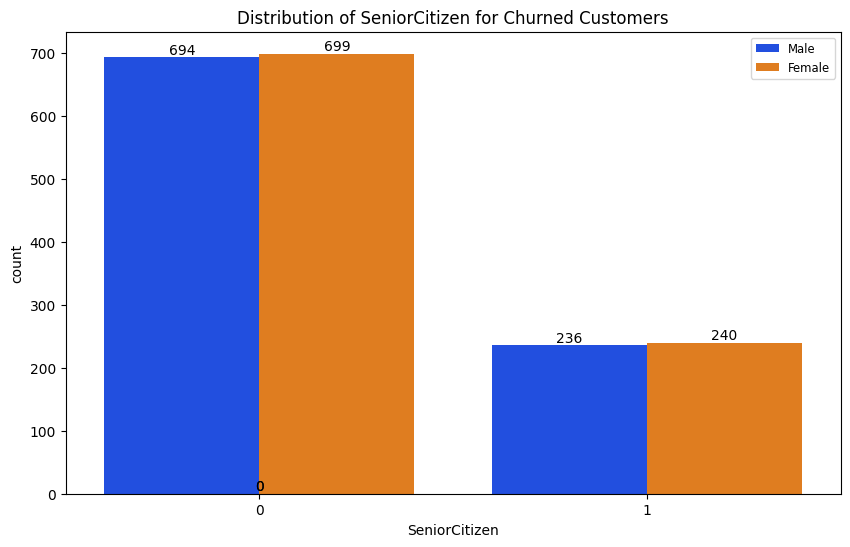

In [72]:
uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

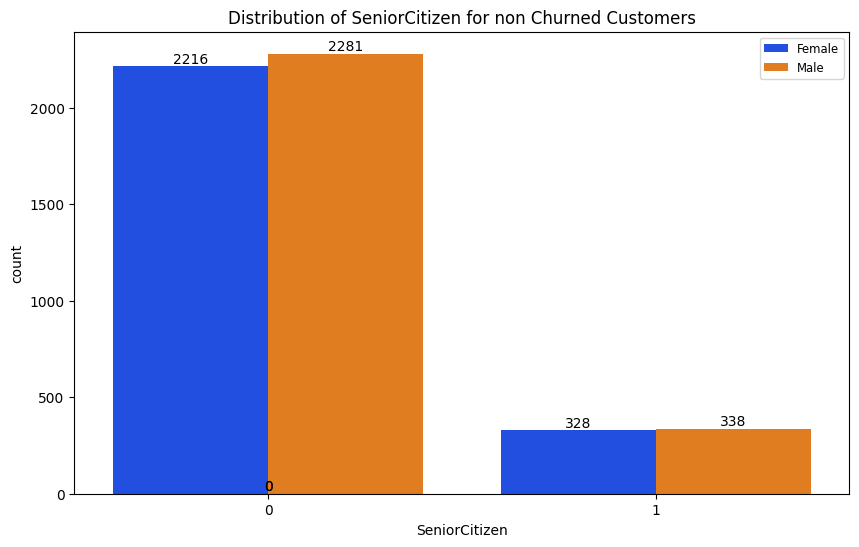

In [73]:
uniplot(new_df1_target0,col='SeniorCitizen',title='Distribution of SeniorCitizen for non Churned Customers',hue='gender')


Churn Rate of males no SeniorCitizen:23.3%

 males SeniorCitizen: 41.1%

Churn Rate of females no SeniorCitizen :23.9%

Females SeniorCitizen :42.2%